# 회귀 신경망 실습

In [2]:
import numpy as np
import tensorflow as tf 
np.random.seed(0)
tf.random.set_seed(0)

## 집값 데이터 로드

In [5]:
from sklearn import datasets
raw_boston = datasets.load_boston()

## 피처 데이터, 타겟 데이터

In [8]:
X = raw_boston.data
y = raw_boston.target

## 13개의 피처

In [9]:
X.shape

(506, 13)

## 연속형 데이터 , 회귀 문제

In [10]:
set(y)

{5.0,
 5.6,
 6.3,
 7.0,
 7.2,
 7.4,
 7.5,
 8.1,
 8.3,
 8.4,
 8.5,
 8.7,
 8.8,
 9.5,
 9.6,
 9.7,
 10.2,
 10.4,
 10.5,
 10.8,
 10.9,
 11.0,
 11.3,
 11.5,
 11.7,
 11.8,
 11.9,
 12.0,
 12.1,
 12.3,
 12.5,
 12.6,
 12.7,
 12.8,
 13.0,
 13.1,
 13.2,
 13.3,
 13.4,
 13.5,
 13.6,
 13.8,
 13.9,
 14.0,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.6,
 14.8,
 14.9,
 15.0,
 15.1,
 15.2,
 15.3,
 15.4,
 15.6,
 15.7,
 16.0,
 16.1,
 16.2,
 16.3,
 16.4,
 16.5,
 16.6,
 16.7,
 16.8,
 17.0,
 17.1,
 17.2,
 17.3,
 17.4,
 17.5,
 17.6,
 17.7,
 17.8,
 17.9,
 18.0,
 18.1,
 18.2,
 18.3,
 18.4,
 18.5,
 18.6,
 18.7,
 18.8,
 18.9,
 19.0,
 19.1,
 19.2,
 19.3,
 19.4,
 19.5,
 19.6,
 19.7,
 19.8,
 19.9,
 20.0,
 20.1,
 20.2,
 20.3,
 20.4,
 20.5,
 20.6,
 20.7,
 20.8,
 20.9,
 21.0,
 21.1,
 21.2,
 21.4,
 21.5,
 21.6,
 21.7,
 21.8,
 21.9,
 22.0,
 22.1,
 22.2,
 22.3,
 22.4,
 22.5,
 22.6,
 22.7,
 22.8,
 22.9,
 23.0,
 23.1,
 23.2,
 23.3,
 23.4,
 23.5,
 23.6,
 23.7,
 23.8,
 23.9,
 24.0,
 24.1,
 24.2,
 24.3,
 24.4,
 24.5,
 24.6,
 24.7,
 

## 트레이닝/ 테스트 분할

In [11]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=0)

## 신경망 생성

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

n_feat = X_tn.shape[1]
epo = 30 

model = Sequential()

#아웃풋 차원?????? 20??????????
model.add(Dense(20, input_dim=n_feat, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## 모형 컴파일

In [13]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = ['mean_squared_error'])

## 신경망 학습

In [20]:
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
76/76 [==============================] - 0s 386us/step - loss: 32.1289 - mean_squared_error: 32.1289
Epoch 2/30
76/76 [==============================] - 0s 372us/step - loss: 29.0281 - mean_squared_error: 29.0281
Epoch 3/30
76/76 [==============================] - 0s 359us/step - loss: 26.8747 - mean_squared_error: 26.8747
Epoch 4/30
76/76 [==============================] - 0s 372us/step - loss: 27.6006 - mean_squared_error: 27.6006
Epoch 5/30
76/76 [==============================] - 0s 372us/step - loss: 38.4620 - mean_squared_error: 38.4620
Epoch 6/30
76/76 [==============================] - 0s 378us/step - loss: 33.1269 - mean_squared_error: 33.1269
Epoch 7/30
76/76 [==============================] - 0s 375us/step - loss: 35.7030 - mean_squared_error: 35.7030
Epoch 8/30
76/76 [==============================] - 0s 372us/step - loss: 28.6823 - mean_squared_error: 28.6823
Epoch 9/30
76/76 [==============================] - 0s 372us/step - loss: 27.7034 - mean_squared_error: 

## 모형평가

In [21]:
model.evaluate(X_tn,y_tn)

12/12 [==============================] - 0s 453us/step - loss: 35.9345 - mean_squared_error: 35.9345


[35.93445587158203, 35.93445587158203]

In [22]:
model.evaluate(X_te,y_te)

4/4 [==============================] - 0s 665us/step - loss: 56.0674 - mean_squared_error: 56.0674


[56.06744384765625, 56.06744384765625]

## 시각화

In [23]:
import numpy as np
epoch = np.arange(1, epo+1)
mse = hist.history['mean_squared_error']
loss = hist.history['loss']

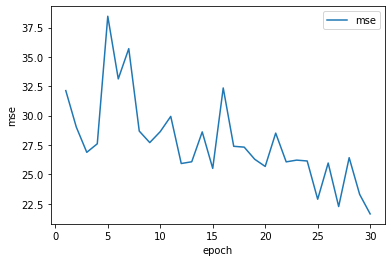

In [26]:
import matplotlib.pyplot as plt 

plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.show()

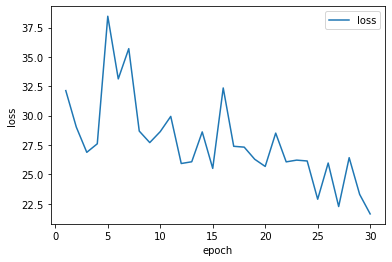

In [27]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss, label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 실제값과 예측값 데이터프레임, 그래프

In [33]:
pred_y = model.predict(X_te).flatten()

import pandas as pd 

res_df = pd.DataFrame(pred_y, columns=['predict_val'])
res_df['real'] = y_te
df_sort = res_df.sort_values(['predict_val'], ascending=True)
df_sort.head(3)

,predict_val,real
96,1.130471,13.8
75,1.777642,7.4
116,1.901460,8.4


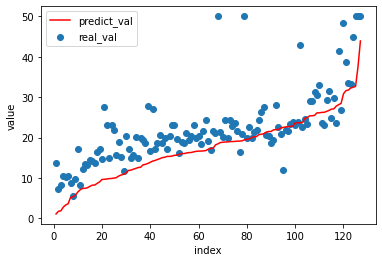

In [35]:
idx = np.arange(1, len(df_sort)+1)
plt.scatter(idx, df_sort['real'], marker='o', label='real_val')
plt.plot(idx, df_sort['predict_val'], color='r', label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()